In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [34]:
db=pd.read_csv('D:/Data Science/DS_Doc/GeorgeML/Reinforcement_Learning/Ads_CTR_Optimisation.csv')


### Choose Ads Randomly

In [35]:
import random
N=10000
d=10
ads_selected=[]
total_reward=0
for n in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=db.values[n,ad]
    total_reward=total_reward+reward
total_reward

1230

<function matplotlib.pyplot.show(*args, **kw)>

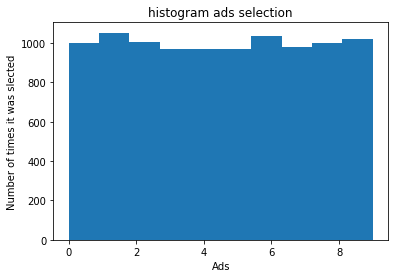

In [36]:
plt.hist(ads_selected)
plt.title("histogram ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times it was slected")
plt.show

##### we can see that all ads have been selected almost equally , so we need a way to maximize our viewed ad

### UCB

In [63]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i]))#we did n+1 because N starts with 0 so we can't do log(0)
            upper_bound = average_reward + delta_i
        else:
            #we need to get the upper bound after 10 rounds ( when rounds>10 the  max upper bounds will still<upper bound )
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = db.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [64]:
total_reward

2178

##### Total reward using UCB is much bigger than the first one

<function matplotlib.pyplot.show(*args, **kw)>

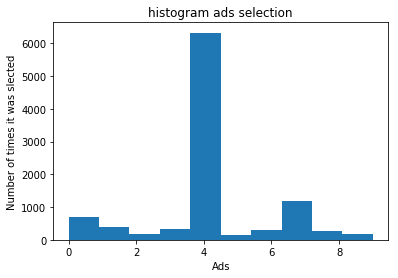

In [67]:
plt.hist(ads_selected)
plt.title("histogram ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times it was slected")
plt.show

#### We can conclude that depending on the UCB the ad number 4 is highly recommended to maximize the gains 